CS3642 : Artificial Intelligence  
Spring 2024  
Kennesaw State University  
**Homework 03**

In this project, we will explore the MNIST handwritten digits
dataset, available at:  
  http://yann.lecun.com/exdb/mnist/

The dataset included in this project was downloaded using TensorFlow:  
  https://www.tensorflow.org/datasets/catalog/mnist

In [1]:
# install numpy and scikit-learn
import numpy as np
from sklearn.naive_bayes import BernoulliNB as NaiveBayes
from sklearn.naive_bayes import GaussianNB
# included module for loading MNIST
from mnist import Mnist

In [2]:
dataset = Mnist()
all_images = dataset.images()
all_labels = dataset.labels()

MNIST is a dataset of handwritten image.

The dataset contains 55,000 images, and each image has 28x28 = 784 pixels.

For the purposes of this project, we are dealing with pure black and white images (not grayscale).

Below, we plot three example digits from the dataset.

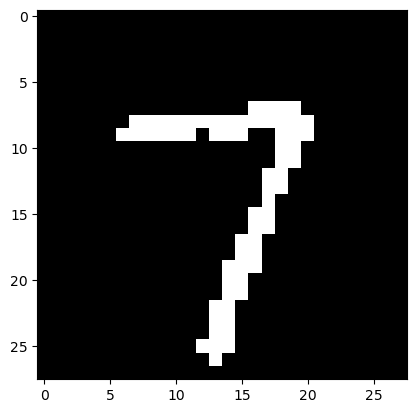

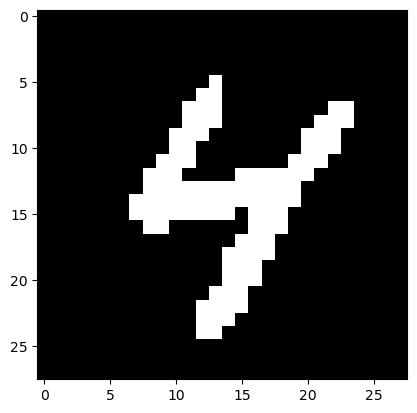

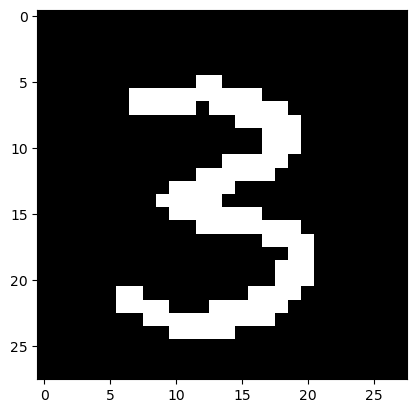

In [3]:
for index in range(100,103):
    image,label = all_images[index],all_labels[index]
    dataset.plot_image(image)

We will consider classification between two different digits at a time (this is called one-versus-one classification).  First, we shall extract all images of zeros and ones.

In [4]:
# pick two digits to compare
class_i,class_j = 0,1
# get all indices for class i and class j
i_indices = all_labels == class_i
j_indices = all_labels == class_j
indices = np.logical_or(i_indices,j_indices)
# get the subset of the images/labels with the desired indices
images = all_images[indices]
labels = all_labels[indices]

We will initialize a naive Bayes classifier, and learn its parameters from the images and the labels, using the call to "fit".  Below we print the resulting accuracy of the classifier, based on the dataset that we used to train it.

In [5]:
# learn the classifier from data
classifier = NaiveBayes()
classifier.fit(images,labels)
# use the classifier to predict the labels of the training set, and then compute the accuracy
predictions = classifier.predict(images)
correct = sum(predictions == labels)
print("(%d vs %d) accuracy %.4f%% (%d/%d)" % (class_i,class_j,
                                              100*correct/len(images),
                                              correct,len(images)))

(0 vs 1) accuracy 99.5182% (11567/11623)


For each pixel p, a naive Bayes classifier learns the following types of probabilities:
- $\Pr(d_0)$ and $\Pr(d_1)$ the probability of seeing a digit 0 ($d_0$) and the probability of seeing a digit 1 ($d_1$)
- $\Pr(p \mid d_0)$ the probability of the pixel being white or black, given that the image was of a 0
- $\Pr(p \mid d_1)$ the probability of the pixel being white or black, given that the image was of a 1

Next, we print or visualize each of these probabilities.

In [6]:
# print probability of being a digit 0 or a digit 1, which was learned from the dataset
pr_digit = np.exp(classifier.class_log_prior_)
print("Pr(digit-%d) = %.4f" % (class_i,pr_digit[0]))
print("Pr(digit-%d) = %.4f" % (class_j,pr_digit[1]))

Pr(digit-0) = 0.4684
Pr(digit-1) = 0.5316


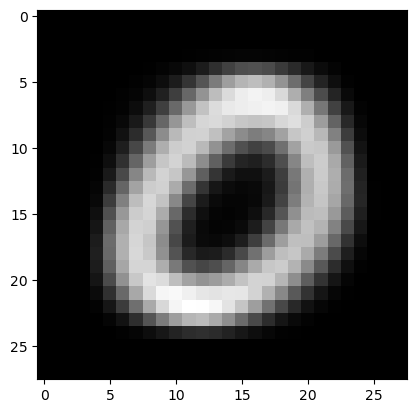

In [7]:
# plot the probability of a pixel being white, given the image was of a zero
pr_image_i = np.exp(classifier.feature_log_prob_[0])
dataset.plot_image(pr_image_i)

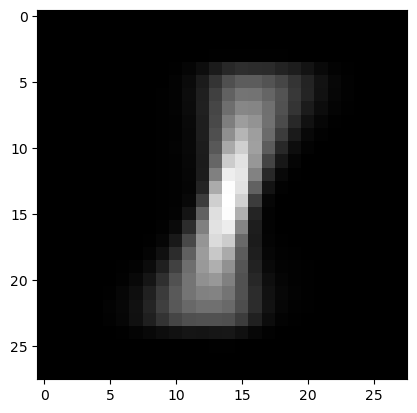

In [8]:
# plot the probability of a pixel being white, given the image was of a one
pr_image_j = np.exp(classifier.feature_log_prob_[1])
dataset.plot_image(pr_image_j)

In the two images above, the brighter pixels mean that the pixel has a higher probability of being a white pixel, and the darker pixels mean that the pixel has a lower probability of being a white pixel.  In other words, the probability $\Pr(p \mid d_0)$ is the probability of the pixel being white, given that the image is known to be an image of a digit zero.

In the case of a naive Bayes classifier, the above visualizations are also equivalent to averaging all the images of zeros together, and separately, averaging all the images of ones together.

Below, we visualize the quantity:
$$
\log \frac{\Pr(p \mid d_0)}{\Pr(p \mid d_1)} = \log \Pr(p \mid d_0) - \log \Pr(p \mid d_1).
$$
This quantity tells us, for a given pixel, the relative likelihood that it came from a digit 0, compared to a digit 1.

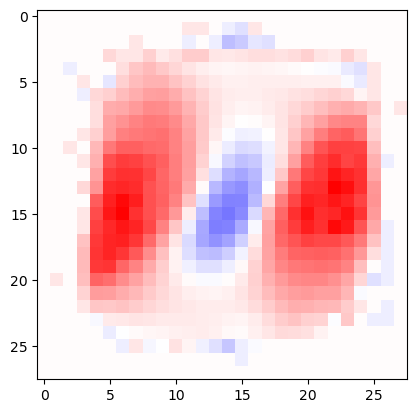

In [9]:
diff_ij = classifier.feature_log_prob_[0] - classifier.feature_log_prob_[1]
limit = max(abs(diff_ij))
dataset.plot_image(diff_ij,cmap="bwr",limit=limit)

In the above image, red pixels are more indicative of the image being a 0, whereas blue pixels are more indicative of the image being a 1.  White pixels are not indicative of either digit.

Next, we look for the image that had the highest probability of being a zero, and then overlay it on the above image, to see why it was classified as a zero.

[0.07250364 0.92749636]
0


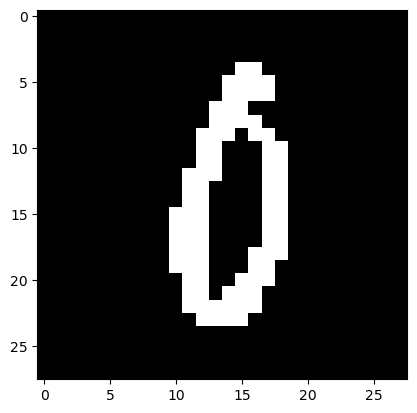

In [10]:
log_pr = classifier.predict_log_proba(images)
print(np.exp(log_pr[19]))
print(labels[19])
dataset.plot_image(images[19])

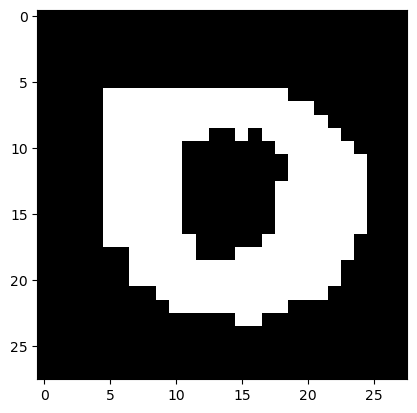

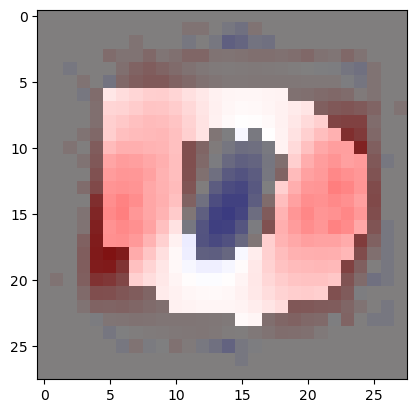

In [11]:
log_pr = classifier.predict_log_proba(images)
diff_log_pr = log_pr[:,0]-log_pr[:,1]
max_index = np.argmax(diff_log_pr)
image,label = images[max_index],labels[max_index]
dataset.plot_image(image)
dataset.plot_image(diff_ij,cmap="bwr",limit=limit,second=image)

When we overlay the image of the zero onto the red/blue image, we see that the white pixels of the zero mostly hit only the red pixels, and very few blue pixels.  We can do the same for the image that had the highest probability of being a one, next.

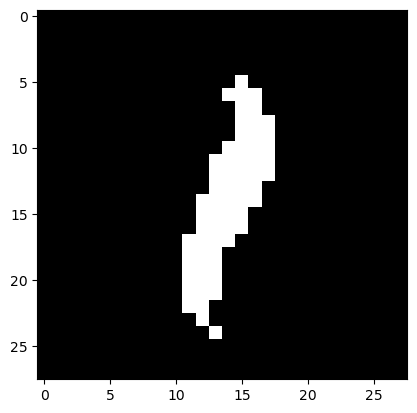

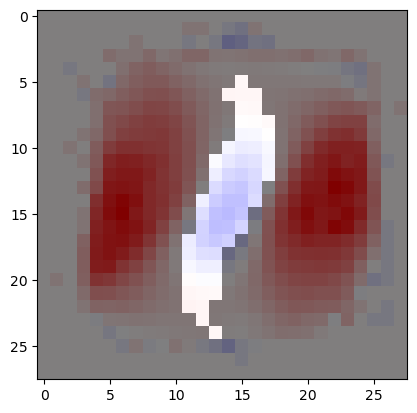

In [12]:
min_index = np.argmin(diff_log_pr)
image,label = images[min_index],labels[min_index]
dataset.plot_image(image)
dataset.plot_image(diff_ij,cmap="bwr",limit=limit,second=image)

In this case, the white pixels mostly hit only the blue pixels, and avoid most of the red pixels.

In general, for this naive Bayes classifier, the more red pixels an image hits the more likely the image will be classified as a zero.  The more blue pixels an image hits, the more likely the image will be classified as a one.

Answer the following questions about this naive Bayes classifier learned from the dataset of zeros and ones.

1. Some images that were labeled as a digit zero in the training set were misclassified as being a digit one by the classifier.  Find the image of a zero that had the highest probability of being a one (include a picture).  Explain why the digit was classified as a one instead of as a zero (include a visualization, like we did above).

2. Some images that were labeled as a digit one in the training set were misclassified as being a digit zero by the classifier.  Find the image of a one that had the highest probability of being a zero (include a picture).  Explain why the digit was classified as a zero instead of as a one (include a visualization, like we did above).

3. Train another naive Bayes classifier using any other pair of digits $i$ and $j$, besides $i=0$ and $j=1$.  Provide a single example of a digit labeled $i$ being misclassified as $j$, with a visualization of why it was misclassified (like we did above).


**Turn in** a pdf containing the answers to the above questions onto the course website under *Assignments* and *Homework 03.*  Assignments are due Friday, March 1 by 11:59pm.  Please start early in case you encounter any unexpected difficulties.